In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Population_Check_Results.csv')
df

,Unnamed: 0,p-value,model,latent_dimension,mask_num,county
0,0,0.431200,GAP,20,2,Las Vegas
1,1,0.679200,GAP,12,2,Las Vegas
2,2,0.796400,GAP,15,2,Las Vegas
3,3,0.000000,PPCA,10,5,Las Vegas
4,4,0.000000,GAP,10,1,Las Vegas
...,...,...,...,...,...,...
2334,2334,0.000000,PPCA,20,3,New England
2335,2335,0.000000,GAP,5,4,New England
2336,2336,0.404333,GAP,5,5,New England
2337,2337,0.000000,GAP,10,5,New England


Las Vegas
[5, 10, 12, 15, 20]
Tampa Bay
[5, 10, 15, 20]
Green Bay
[5, 10, 15, 20, 52]
Carolina
[3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
Cincinnati
[5, 10, 13, 15, 20]
NY Jets
[5, 7, 10, 15, 20]
Chicago
[5, 10, 15, 20]
Philadelphia
[5, 10, 15, 20]
Denver
[5, 10, 15, 20]
San Francisco
[5, 10, 15, 20]
Indianapolis
[5, 10, 15, 20]
Baltimore
[5, 10, 15, 20]
Cleveland
[1, 5, 10, 11, 12, 15, 20]
Dallas
[5, 10, 15, 20, 37]
Tennessee
[5, 10, 13, 15, 20]
New Orleans
[5, 10, 15, 18, 20]
Jacksonville
[5, 10, 12, 15, 20]
Seattle
[5, 10, 14, 15, 20]
Buffalo
[5, 8, 10, 11, 15, 20, 25, 30, 35]
LA Rams
[5, 8, 10, 15, 20, 25, 30]
Miami
[3, 4, 5, 8, 10, 11, 12, 15, 20, 30, 35]
NY Giants
[5, 7, 10, 15, 20]
Kansas City
[5, 10, 11, 15, 20]
Houston
[5, 10, 12, 15, 20, 30, 35, 40]
Minnesota
[5, 10, 15, 20]
Pittsburgh
[5, 10, 15, 20, 25]
Atlanta
[5, 7, 10, 15, 20]
Washington
[4, 5, 10, 15, 20]
LA Chargers
[5, 8, 10, 15, 20]
New England
[5, 9, 10, 15, 20]
Detroit
[5, 10, 12, 15, 20]


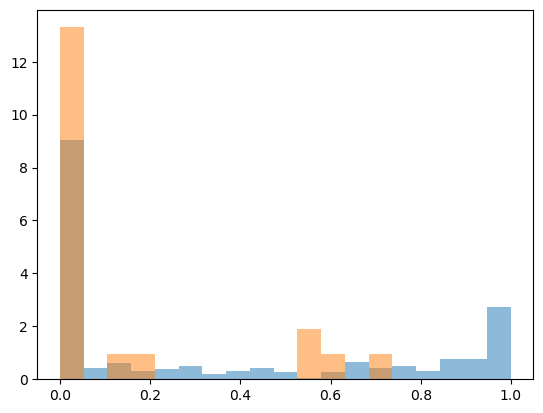

In [2]:
for county in df['county'].unique():
    df_county = df[df['county']==county].copy()
    print(county)
    print(sorted(df_county['latent_dimension'].unique()))
    # for latent_dimension in sorted(df_county['latent_dimension'].unique()):
        # for model in 

df['rejected'] = ~df['p-value'].between(0.025, 0.975)
df['avg_rejected'] = df.groupby(['model', 'county', 'latent_dimension'])['rejected'].transform('mean')
df['min_avg_reject_rate'] = df.groupby(['model', 'county'])['avg_rejected'].transform('min')
df['best_reject_rate'] = df['avg_rejected'] == df['min_avg_reject_rate']


df_best = df[df['best_reject_rate'] & (df['min_avg_reject_rate'] < 1.0)].copy()
# df_best = df[df['best_reject_rate']].copy()
bins = np.linspace(0,1,20)
_, bins, _ = plt.hist(df_best[df_best['model']=='GAP']['p-value'].values, density=True, alpha=0.5, bins=bins)
_, bins, _ = plt.hist(df_best[df_best['model']=='PPCA']['p-value'].values, density=True, alpha=0.5, bins=bins)
# df['selected'] = False
# # df[~df['rejected']]

# tmp = df.groupby(['model', 'county', 'latent_dimension'])['rejected'].mean().reset_index()
# for county in tmp['county'].unique():
#     for model in ['GAP', 'PPCA']:
#         tmp_model_county = tmp[(tmp['county']==county) & (tmp['model']==model)].copy()
#         min_reject_rte = tmp_model_county['rejected'].min()
#         if min_reject_rte < 1:
#             for K in tmp_model_county[tmp_model_county['rejected']==min_reject_rte]['latent_dimension'].unique():
#                 idx = (df['county']==county) & (df['model']==model) & (df['latent_dimension']==K)
#                 df.loc[idx, 'selected'] = True
# df[df['selected']]
                

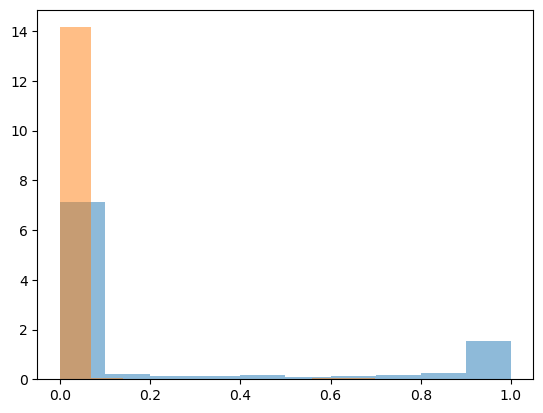

In [6]:
_, bins, _ = plt.hist(df[df['model']=='GAP']['p-value'].values, alpha=0.5, density=True)
_, bins, _ = plt.hist(df[df['model']=='PPCA']['p-value'].values, alpha=0.5, density=True)

In [4]:
df_best[['model', 'county', 'latent_dimension']].drop_duplicates(keep='first')

,model,county,latent_dimension
0,GAP,Las Vegas,20
1,GAP,Las Vegas,12
54,GAP,Tampa Bay,10
92,GAP,Green Bay,5
98,GAP,Green Bay,15
103,PPCA,Green Bay,52
108,PPCA,Green Bay,5
185,GAP,Cincinnati,10
219,GAP,Cincinnati,5
231,GAP,NY Jets,10
